In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json
import random
from config import owm_api_key
plt.style.use('seaborn')

In [2]:
# Gather 500 unique cities randomly

cities = pd.DataFrame({
    "City":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[]
})

city_names = []
country_codes = []
lats = []
lngs = []
duplicate = True

for i in range(0, 500):
    duplicate = True
    while duplicate == True:
        lat = random.uniform(-90, 90)
        lng = random.uniform(-180, 180)
        location = (lat, lng)
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        country_code = city.country_code
        
        dup_found = False
        for existing_city in city_names:
            if city_name == existing_city:
                dup_found = True
            
        if dup_found == False:
            city_names.append(city_name)
            country_codes.append(country_code)
            lats.append(lat)
            lngs.append(lng)
            duplicate = False

cities["City"] = city_names
cities["Country"] = country_codes
cities["Latitude"] = lats
cities["Longitude"] = lngs
city_count = len(cities["City"])
print(f"Successfully generated a list of {city_count} cities.")
cities.head()

Successfully generated a list of 500 cities.


,City,Country,Latitude,Longitude
0,ahipara,nz,-33.037724,165.342768
1,airai,pw,11.750029,142.325701
2,sainte-claire,ca,46.700432,-70.818607
3,mataura,pf,-61.240065,-148.758144
4,atuona,pf,-3.610970,-146.592182


In [3]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

base_url = "http://api.openweathermap.org/data/2.5/forecast"
responses = []
i = 0

for index, row in cities.iterrows():
    i = i+1
    city_name = row["City"]
    country_code = row["Country"]
    params = {
        "q":f"{city_name},{country_code}",
        "appid":owm_api_key,
        "units":"imperial"
    }
    print(f"Retrieving data for city #{i} ({city_name}, {country_code})...")
    print(f"{base_url}?q={city_name},{country_code}&units=imperial&appid=***")
    response = requests.get(base_url, params=params).json()    
    responses.append(response)   

Retrieving data for city #1 (ahipara, nz)...
http://api.openweathermap.org/data/2.5/forecast?q=ahipara,nz&units=imperial&appid=***
Retrieving data for city #2 (airai, pw)...
http://api.openweathermap.org/data/2.5/forecast?q=airai,pw&units=imperial&appid=***
Retrieving data for city #3 (sainte-claire, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=sainte-claire,ca&units=imperial&appid=***
Retrieving data for city #4 (mataura, pf)...
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=imperial&appid=***
Retrieving data for city #5 (atuona, pf)...
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=imperial&appid=***
Retrieving data for city #6 (zlotoryja, pl)...
http://api.openweathermap.org/data/2.5/forecast?q=zlotoryja,pl&units=imperial&appid=***
Retrieving data for city #7 (north bend, us)...
http://api.openweathermap.org/data/2.5/forecast?q=north bend,us&units=imperial&appid=***
Retrieving data for city #8 (mar del plata, ar)...
http://api.openw

Retrieving data for city #63 (yuli, tw)...
http://api.openweathermap.org/data/2.5/forecast?q=yuli,tw&units=imperial&appid=***
Retrieving data for city #64 (vestmanna, fo)...
http://api.openweathermap.org/data/2.5/forecast?q=vestmanna,fo&units=imperial&appid=***
Retrieving data for city #65 (mitsamiouli, km)...
http://api.openweathermap.org/data/2.5/forecast?q=mitsamiouli,km&units=imperial&appid=***
Retrieving data for city #66 (khalilabad, in)...
http://api.openweathermap.org/data/2.5/forecast?q=khalilabad,in&units=imperial&appid=***
Retrieving data for city #67 (lompoc, us)...
http://api.openweathermap.org/data/2.5/forecast?q=lompoc,us&units=imperial&appid=***
Retrieving data for city #68 (barentsburg, sj)...
http://api.openweathermap.org/data/2.5/forecast?q=barentsburg,sj&units=imperial&appid=***
Retrieving data for city #69 (norman wells, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=norman wells,ca&units=imperial&appid=***
Retrieving data for city #70 (tsihombe, mg)...
h

Retrieving data for city #125 (vicuna, cl)...
http://api.openweathermap.org/data/2.5/forecast?q=vicuna,cl&units=imperial&appid=***
Retrieving data for city #126 (georgetown, sh)...
http://api.openweathermap.org/data/2.5/forecast?q=georgetown,sh&units=imperial&appid=***
Retrieving data for city #127 (spoleto, it)...
http://api.openweathermap.org/data/2.5/forecast?q=spoleto,it&units=imperial&appid=***
Retrieving data for city #128 (albany, au)...
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=imperial&appid=***
Retrieving data for city #129 (port alfred, za)...
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=imperial&appid=***
Retrieving data for city #130 (bethel, us)...
http://api.openweathermap.org/data/2.5/forecast?q=bethel,us&units=imperial&appid=***
Retrieving data for city #131 (staryy nadym, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=staryy nadym,ru&units=imperial&appid=***
Retrieving data for city #132 (moose factory, ca)..

Retrieving data for city #186 (araouane, ml)...
http://api.openweathermap.org/data/2.5/forecast?q=araouane,ml&units=imperial&appid=***
Retrieving data for city #187 (basco, ph)...
http://api.openweathermap.org/data/2.5/forecast?q=basco,ph&units=imperial&appid=***
Retrieving data for city #188 (tasiilaq, gl)...
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=imperial&appid=***
Retrieving data for city #189 (grindavik, is)...
http://api.openweathermap.org/data/2.5/forecast?q=grindavik,is&units=imperial&appid=***
Retrieving data for city #190 (faya, td)...
http://api.openweathermap.org/data/2.5/forecast?q=faya,td&units=imperial&appid=***
Retrieving data for city #191 (numan, ng)...
http://api.openweathermap.org/data/2.5/forecast?q=numan,ng&units=imperial&appid=***
Retrieving data for city #192 (amapa, br)...
http://api.openweathermap.org/data/2.5/forecast?q=amapa,br&units=imperial&appid=***
Retrieving data for city #193 (zhanaozen, kz)...
http://api.openweathermap.org/

Retrieving data for city #247 (lorengau, pg)...
http://api.openweathermap.org/data/2.5/forecast?q=lorengau,pg&units=imperial&appid=***
Retrieving data for city #248 (sinnamary, gf)...
http://api.openweathermap.org/data/2.5/forecast?q=sinnamary,gf&units=imperial&appid=***
Retrieving data for city #249 (chokurdakh, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=imperial&appid=***
Retrieving data for city #250 (dicabisagan, ph)...
http://api.openweathermap.org/data/2.5/forecast?q=dicabisagan,ph&units=imperial&appid=***
Retrieving data for city #251 (ulladulla, au)...
http://api.openweathermap.org/data/2.5/forecast?q=ulladulla,au&units=imperial&appid=***
Retrieving data for city #252 (luanda, ao)...
http://api.openweathermap.org/data/2.5/forecast?q=luanda,ao&units=imperial&appid=***
Retrieving data for city #253 (hami, cn)...
http://api.openweathermap.org/data/2.5/forecast?q=hami,cn&units=imperial&appid=***
Retrieving data for city #254 (upernavik, gl)...
http

Retrieving data for city #308 (sokolo, ml)...
http://api.openweathermap.org/data/2.5/forecast?q=sokolo,ml&units=imperial&appid=***
Retrieving data for city #309 (bure, et)...
http://api.openweathermap.org/data/2.5/forecast?q=bure,et&units=imperial&appid=***
Retrieving data for city #310 (charters towers, au)...
http://api.openweathermap.org/data/2.5/forecast?q=charters towers,au&units=imperial&appid=***
Retrieving data for city #311 (benjamin aceval, py)...
http://api.openweathermap.org/data/2.5/forecast?q=benjamin aceval,py&units=imperial&appid=***
Retrieving data for city #312 (kununurra, au)...
http://api.openweathermap.org/data/2.5/forecast?q=kununurra,au&units=imperial&appid=***
Retrieving data for city #313 (sioux lookout, ca)...
http://api.openweathermap.org/data/2.5/forecast?q=sioux lookout,ca&units=imperial&appid=***
Retrieving data for city #314 (marcona, pe)...
http://api.openweathermap.org/data/2.5/forecast?q=marcona,pe&units=imperial&appid=***
Retrieving data for city #315

Retrieving data for city #368 (guadalajara, es)...
http://api.openweathermap.org/data/2.5/forecast?q=guadalajara,es&units=imperial&appid=***
Retrieving data for city #369 (khandyga, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=khandyga,ru&units=imperial&appid=***
Retrieving data for city #370 (fukue, jp)...
http://api.openweathermap.org/data/2.5/forecast?q=fukue,jp&units=imperial&appid=***
Retrieving data for city #371 (dali, cn)...
http://api.openweathermap.org/data/2.5/forecast?q=dali,cn&units=imperial&appid=***
Retrieving data for city #372 (saint george, bm)...
http://api.openweathermap.org/data/2.5/forecast?q=saint george,bm&units=imperial&appid=***
Retrieving data for city #373 (codrington, ag)...
http://api.openweathermap.org/data/2.5/forecast?q=codrington,ag&units=imperial&appid=***
Retrieving data for city #374 (wanning, cn)...
http://api.openweathermap.org/data/2.5/forecast?q=wanning,cn&units=imperial&appid=***
Retrieving data for city #375 (saint-philippe, re)...

Retrieving data for city #429 (yuryevets, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=yuryevets,ru&units=imperial&appid=***
Retrieving data for city #430 (mareeba, au)...
http://api.openweathermap.org/data/2.5/forecast?q=mareeba,au&units=imperial&appid=***
Retrieving data for city #431 (maryborough, au)...
http://api.openweathermap.org/data/2.5/forecast?q=maryborough,au&units=imperial&appid=***
Retrieving data for city #432 (dongying, cn)...
http://api.openweathermap.org/data/2.5/forecast?q=dongying,cn&units=imperial&appid=***
Retrieving data for city #433 (bagan, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=bagan,ru&units=imperial&appid=***
Retrieving data for city #434 (ferrol, es)...
http://api.openweathermap.org/data/2.5/forecast?q=ferrol,es&units=imperial&appid=***
Retrieving data for city #435 (basoko, cd)...
http://api.openweathermap.org/data/2.5/forecast?q=basoko,cd&units=imperial&appid=***
Retrieving data for city #436 (wenling, cn)...
http://api.openw

Retrieving data for city #490 (shizunai, jp)...
http://api.openweathermap.org/data/2.5/forecast?q=shizunai,jp&units=imperial&appid=***
Retrieving data for city #491 (quatre cocos, mu)...
http://api.openweathermap.org/data/2.5/forecast?q=quatre cocos,mu&units=imperial&appid=***
Retrieving data for city #492 (klichka, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=klichka,ru&units=imperial&appid=***
Retrieving data for city #493 (domna, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=domna,ru&units=imperial&appid=***
Retrieving data for city #494 (vila, vu)...
http://api.openweathermap.org/data/2.5/forecast?q=vila,vu&units=imperial&appid=***
Retrieving data for city #495 (bolonchen, mx)...
http://api.openweathermap.org/data/2.5/forecast?q=bolonchen,mx&units=imperial&appid=***
Retrieving data for city #496 (korgen, no)...
http://api.openweathermap.org/data/2.5/forecast?q=korgen,no&units=imperial&appid=***
Retrieving data for city #497 (katherine, au)...
http://api.openw

In [5]:
cities["Temperature (F)"] = ""
cities["Humidity (%)"] = ""
cities["Cloudiness (%)"] = ""
cities["Wind Speed (mph)"] = ""

avg_temps = []
avg_humidities = []
avg_clouds = []
avg_winds = []
i = 0

for response in responses:
    temps = []
    humidities = []
    winds = []
    clouds = []
    
    try:
        forecast = response["list"]
        for item in forecast:
            temp = item["main"]["temp"]
            temps.append(temp)
            humidity = item["main"]["humidity"]
            humidities.append(humidity)
            cloudiness = item["clouds"]["all"]
            clouds.append(cloudiness)
            wind = item["wind"]["speed"]
            winds.append(wind)
        avg_temp = np.mean(temps)
        avg_humidity = np.mean(humidities)
        avg_cloudiness = np.mean(clouds)
        avg_wind = np.mean(winds)
    except KeyError:
        print(f"Could not retrieve data for {cities.loc[i,'City']}, {cities.loc[i,'Country']}")
        avg_temp = None
        avg_humidity = None
        avg_cloudiness = None
        avg_wind = None
    avg_temps.append(avg_temp)
    avg_humidities.append(avg_humidity)
    avg_clouds.append(avg_cloudiness)
    avg_winds.append(avg_wind)
    i = i+1
    
cities["Temperature (F)"] = avg_temps
cities["Humidity (%)"] = avg_humidities
cities["Cloudiness (%)"] = avg_clouds
cities["Wind Speed (mph)"] = avg_winds
cities.head()

Could not retrieve data for airai, pw
Could not retrieve data for sainte-claire, ca
Could not retrieve data for mataura, pf
Could not retrieve data for taolanaro, mg
Could not retrieve data for mendahara, id
Could not retrieve data for liku, wf
Could not retrieve data for nikolskoye, ru
Could not retrieve data for attawapiskat, ca
Could not retrieve data for kegayli, uz
Could not retrieve data for yuli, tw
Could not retrieve data for barentsburg, sj
Could not retrieve data for tsihombe, mg
Could not retrieve data for illoqqortoormiut, gl
Could not retrieve data for xiangdong, cn
Could not retrieve data for rungata, ki
Could not retrieve data for constitucion, mx
Could not retrieve data for kaitangata, nz
Could not retrieve data for vaitupu, wf
Could not retrieve data for tumannyy, ru
Could not retrieve data for asau, tv
Could not retrieve data for grand river south east, mu
Could not retrieve data for sentyabrskiy, ru
Could not retrieve data for elban, ru
Could not retrieve data for mo

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ahipara,nz,-33.037724,165.342768,58.436842,90.684211,47.894737,14.099474
1,airai,pw,11.750029,142.325701,NaN,NaN,NaN,NaN
2,sainte-claire,ca,46.700432,-70.818607,NaN,NaN,NaN,NaN
3,mataura,pf,-61.240065,-148.758144,NaN,NaN,NaN,NaN
4,atuona,pf,-3.610970,-146.592182,79.327895,100.000000,42.000000,13.285263


In [6]:
# Save a CSV of all data retrieved
cities.to_csv("weather_data.csv", index=False, header=True)

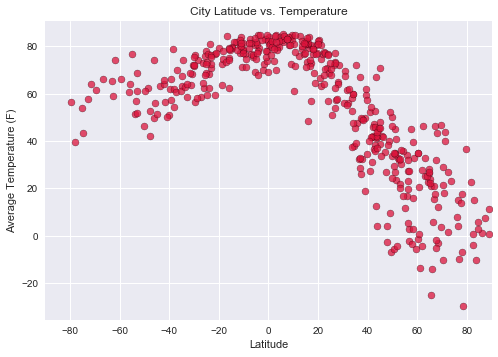

In [7]:
# Plot Temperature vs. Latitude
plt.scatter(cities["Latitude"], cities["Temperature (F)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Temperature")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Average Temperature (F)")
plt.show()

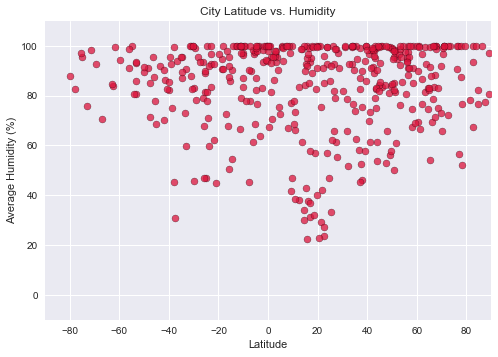

In [8]:
# Plot Humidity vs. Latitude
plt.scatter(cities["Latitude"], cities["Humidity (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Average Humidity (%)")
plt.show()

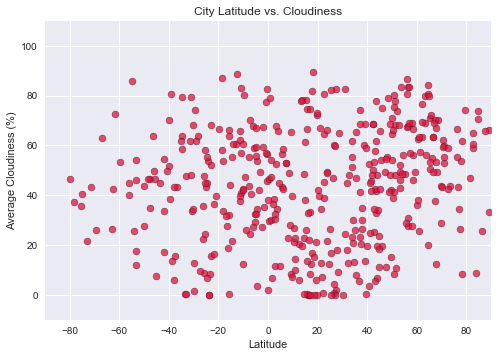

In [9]:
# Plot Cloudiness vs. Latitude
plt.scatter(cities["Latitude"], cities["Cloudiness (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Average Cloudiness (%)")
plt.show()

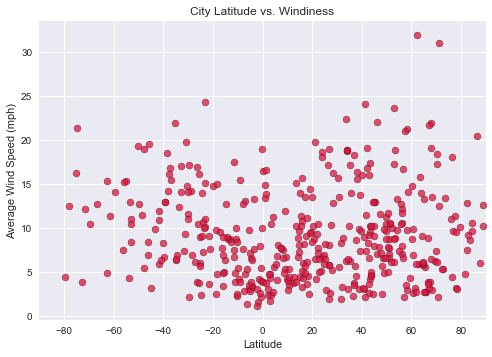

In [10]:
# Plot Windiness vs. Latitude
plt.scatter(cities["Latitude"], cities["Wind Speed (mph)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Windiness")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Average Wind Speed (mph)")
plt.show()